In [28]:
import os
import shutil
import pandas as pd
import plotly.express as px
import plotly
import plotly.graph_objects as go
import chart_studio.plotly as py
from plotly.subplots import make_subplots
import unidecode as uni

import sys
sys.path.append('../src')
import cdhudf

from IPython.core.display import display, HTML

plotly.offline.init_notebook_mode(connected=True)

# CDHU

"Promover condições dignas de moradia para a população de baixo poder aquisitivo consiste na principal atribuição da Secretaria de Estado da Habitação (SH) e de seus dois braços operacionais, a Companhia de Desenvolvimento Habitacional e Urbano (CDHU), e a Agência Paulista de Habitação Social (Casa Paulista), cujo foco de atuação está dirigido ao público-alvo situado na faixa de um a dez salários mínimos, com atendimento prioritário até cinco salários."

http://www.cdhu.sp.gov.br/web/guest/programas-habitacionais/apresentacao

# Análises preliminares

In [29]:
file_path = '../data/cdhu'
file_name = 'proc_nosp.csv'

df = pd.read_csv(os.path.join(file_path,file_name))

In [30]:
df.head()

,Município,Empreendimento,Situação,Data de Entrega,Ano de Entrega,Mês de Entrega,Total de UHS,Total de CCs,Total de UHS + Total de CCs,Total de Fam (Urb),Programa,Ação PPA,SubPrograma,Modalidade,Produto
0,Alto Alegre,ALTO ALEGRE A,COMERCIALIZADA,1992-07-31,1992,7,60,0,60,0,SH3,-,-,Empreitada,UH
1,Alto Alegre,ALTO ALEGRE B1,COMERCIALIZADA,1996-11-05,1996,11,60,0,60,0,SH4,-,-,Empreitada,UH
2,Alto Alegre,ALTO ALEGRE B2,COMERCIALIZADA,1998-03-23,1998,3,12,0,12,0,Sonho Meu,-,-,Habiteto,UH
3,Alto Alegre,ALTO ALEGRE C,COMERCIALIZADA,1998-03-23,1998,3,27,0,27,0,SH4,-,-,Empreitada,UH
4,Alto Alegre,ALTO ALEGRE D,COMERCIALIZADA,2005-01-12,2005,1,65,0,65,0,Autoconstrução,-,-,Auto-Construção,UH


In [31]:
for c in ['Situação','Programa','SubPrograma',
          'Ação PPA','Modalidade','Produto']:
    print("\n- Coluna {}".format(c))
    for v in df[c].unique():
        print(v)


- Coluna Situação
COMERCIALIZADA
COMERCIALIZ. PARCIAL

- Coluna Programa
SH3
SH4
Sonho Meu
Autoconstrução
Parceria com Municípios
Secretaria de Segurança Pública SP
PHAI Servidor Público
Crédito Habitacional
SH2
Provisão de Moradias
Prog Municipal Habitação
Chamamento Empresarial
Núcleo Habitacional por Empreitada
Moradias Indígenas
Atuação em Favelas e Áreas de Risco
Urbanização de Favelas e Assentamentos Precários
Moradia Rural
Reassentamento Habitacional
Lotes Próprios
PLANHAP
Habitação Sustentável e Rec Ambiental Serra e Litoral
Parceria Associações e Cooperativas
Vila Dignidade
Produção Direta
Atuação em Cortiços
Mutirão
Mutirão Associativo
Urbanização de Favelas
Aluguel Social
PROFILURB
Recuperação Socioambiental Serra do Mar
México 70
Guarapiranga
SH1
Moradias Quilombolas

- Coluna SubPrograma
-
Servidor Público
PHAI - Plano de Habitação Integrada
Parceria com Municípios
Moradias Indígenas
Desfavelamento
Reassentamento Habitacional
Trabalhador Rural
Loteamento/ Autoconstrução
Á

## Análise por Programa

In [32]:
query = df[['Programa','Total de UHS + Total de CCs']]\
                    .groupby(by='Programa').sum()\
                    .sort_values(by='Total de UHS + Total de CCs',ascending=False)\
                    .reset_index(drop=False)

In [33]:
query

,Programa,Total de UHS + Total de CCs
0,SH3,89566
1,Provisão de Moradias,53999
2,SH4,48356
3,Sonho Meu,36012
4,Núcleo Habitacional por Empreitada,27284
5,Parceria com Municípios,24547
6,SH2,22434
7,Chamamento Empresarial,18959
8,Autoconstrução,15349
9,Urbanização de Favelas e Assentamentos Precários,11452


In [34]:
labels = query['Programa'].values
values = query['Total de UHS + Total de CCs'].values

In [35]:
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show(renderer="browser")

In [36]:
file_path = '../charts'
file_name = 'programa.html'

plotly.offline.plot(fig, filename = os.path.join(file_path,file_name),auto_open=False)

'../charts/programa.html'

In [79]:
#display(HTML(filename=os.path.join(file_path,file_name)))

## Análise por SubPrograma

In [37]:
query = df[['SubPrograma','Total de UHS + Total de CCs']]\
                    .groupby(by='SubPrograma').sum()\
                    .sort_values(by='Total de UHS + Total de CCs',ascending=False)\
                    .reset_index(drop=False)

In [38]:
labels = query['SubPrograma'].values
values = query['Total de UHS + Total de CCs'].values

In [39]:
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show(renderer="browser")

In [40]:
file_path = '../charts'
file_name = 'subprograma.html'

plotly.offline.plot(fig, filename = os.path.join(file_path,file_name),auto_open=False)

'../charts/subprograma.html'

In [ ]:
#display(HTML(filename=os.path.join(file_path,file_name)))

## Análise por Parceria 

In [41]:
query = df[['Ação PPA','Total de UHS + Total de CCs']]\
                    .groupby(by='Ação PPA').sum()\
                    .sort_values(by='Total de UHS + Total de CCs',ascending=False)\
                    .reset_index(drop=False)

In [42]:
query

,Ação PPA,Total de UHS + Total de CCs
0,-,327572
1,Produção de Moradias,53999
2,Reassentamento Habitacional de Risco e Favelas,11452
3,Recuperação Socioambiental da Serra do Mar,4675
4,Desenvolvimento Sustentável no Litoral Paulista,718
5,Urbanização de Favelas,0


In [43]:
labels = query['Ação PPA'].values
values = query['Total de UHS + Total de CCs'].values

In [44]:
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show(renderer="browser")

In [45]:
file_path = '../charts'
file_name = 'acaoppa.html'

plotly.offline.plot(fig, filename = os.path.join(file_path,file_name),auto_open=False)

'../charts/acaoppa.html'

# Perfil Municípios

In [75]:
query = df[['Município','Total de UHS + Total de CCs']]\
                    .groupby(by=['Município'])\
                    .sum()\
                    .sort_values(by='Total de UHS + Total de CCs',ascending=False)\
                    .reset_index(drop=False)

In [76]:
query

,Município,Total de UHS + Total de CCs
0,Cubatão,6952
1,Guarulhos,6826
2,São José dos Campos,6267
3,Ribeirão Preto,6060
4,Itaquaquecetuba,5915
5,Limeira,5596
6,Campinas,5276
7,São Bernardo do Campo,5110
8,Mogi das Cruzes,4682
9,São José do Rio Preto,4130


### Quais são os 10 municípios com maior número de entregas até o presente momento?

In [77]:
mun_maior_qtd = query.loc[0:9,'Município']

In [91]:
mun_maior_qtd = list(mun_maior_qtd)

In [98]:
mun_maior_qtd

['Cubatão',
 'Guarulhos',
 'São José dos Campos',
 'Ribeirão Preto',
 'Itaquaquecetuba',
 'Limeira',
 'Campinas',
 'São Bernardo do Campo',
 'Mogi das Cruzes',
 'São José do Rio Preto']

## Gráficos individuais

In [176]:
municipio = "Guarulhos"
query = df[df['Município']==municipio][['Ano de Entrega','Total de UHS', 'Total de CCs']]\
                    .groupby(by=['Ano de Entrega'])\
                    .sum()\
                    .sort_values(by='Ano de Entrega')\
                    .reset_index(drop=False)

In [177]:
query

,Ano de Entrega,Total de UHS,Total de CCs
0,1991,902,0
1,1992,688,0
2,1998,748,0
3,2000,140,0
4,2002,120,0
5,2003,1370,91
6,2005,540,0
7,2006,414,0
8,2007,374,1
9,2008,0,4


In [180]:
query[['Ano de Entrega','Total de UHS']]

,Ano de Entrega,Total de UHS
0,1991,902
1,1992,688
2,1998,748
3,2000,140
4,2002,120
5,2003,1370
6,2005,540
7,2006,414
8,2007,374
9,2008,0


In [179]:
fig = make_subplots(rows=2, cols=1, start_cell="bottom-left")

fig1 = px.bar(query, x="Ano de Entrega", 
                     y="Total de UHS")
trace1 = fig1['data'][0]
fig.add_trace(trace1, row=1, col=1)
fig.update_layout(xaxis_tickangle=-45, xaxis_tickmode='linear')

fig1 = px.bar(query, x="Ano de Entrega", 
                     y="Total de CCs")
trace1 = fig1['data'][0]
fig.add_trace(trace1, row=2, col=1)
fig.update_layout(xaxis_tickangle=-45, xaxis_tickmode='linear')

fig.show(renderer="browser")
#fig.add_trace(px.bar(query, x="Ano de Entrega", 
#                     y="Total de UHS + Total de CCs"),
#              row=1, col=1)

## Conjunto

In [119]:
query = df[['Município','Ano de Entrega','Total de UHS + Total de CCs']]\
                    .where(df['Município'].isin(mun_maior_qtd[:4]))\
                    .groupby(by=['Município','Ano de Entrega'])\
                    .sum()\
                    .sort_values(by='Ano de Entrega')\
                    .reset_index(drop=False)

In [123]:
fig = px.bar(query, x="Ano de Entrega", 
             y="Total de UHS + Total de CCs", 
             color='Município')
fig.update_layout(barmode='group', xaxis_tickangle=-45, xaxis_tickmode='linear')
fig.show(renderer="browser")

In [136]:
fig = make_subplots(rows=2, cols=2, start_cell="bottom-left")
row = 1
col = 1

for i in range(4):
    fig1 = px.bar(query, x="Ano de Entrega", 
                         y="Total de UHS + Total de CCs", color="Município")
    trace1 = fig1['data'][i]
    fig.add_trace(trace1, row=row, col=col)
    if row == 2:
        row = 0
        col = 2
    row += 1

fig.show(renderer="browser")
#fig.add_trace(px.bar(query, x="Ano de Entrega", 
#                     y="Total de UHS + Total de CCs"),
#              row=1, col=1)

## Séries históricas

In [ ]:
df[df['Município']=='Adamantina'].plot(x='Ano de Entrega', y='Acumulado Total de CCs', kind='bar')

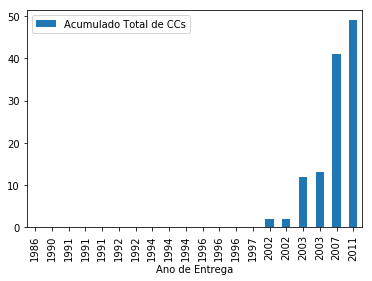

In [18]:
df[df['Município']=='Adamantina'].plot(x='Ano de Entrega', y='Acumulado Total de CCs', kind='bar')

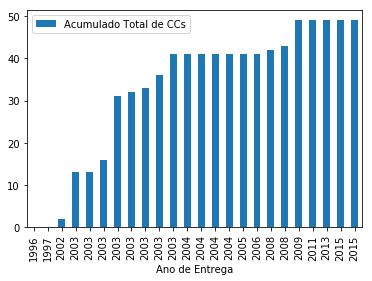

In [19]:
df[df['Município']=='Osasco'].plot(x='Ano de Entrega', y='Acumulado Total de CCs', kind='bar')

In [21]:
df['SubPrograma'].unique()

array(['-', 'Lotes Próprios', 'Desfavelamento', 'Servidor Público',
       'PHAI - Plano de Habitação Integrada',
       'Parceria  Associaçoes e Cooperativas', 'Parceria com Municípios'],
      dtype=object)

In [22]:
df[df['SubPrograma']=='Desfavelamento']

,Município,Empreendimento,Situação,Data de Entrega,Ano de Entrega,Mês de Entrega,Total de UHS,Total de CCs,Total de Fam (Urb),Programa,Ação PPA,SubPrograma,Modalidade,Produto,Acumulado Total de UHS,Acumulado Total de CCs,Acumulado Total de Fam (Urb)
40,Osasco,OSASCO U1/U2 (RMOSA-10),COMERCIALIZADA,2004-01-07,2004,1,160,0,0,Atuação em Favelas e Áreas de Risco,-,Desfavelamento,Empreitada Integral,UH,4265,41,0
41,Osasco,OSASCO U1/U2 (RMOSA-10),COMERCIALIZADA,2004-09-30,2004,9,140,0,0,Atuação em Favelas e Áreas de Risco,-,Desfavelamento,Empreitada Integral,UH,4405,41,0


In [ ]:
fig = px.line(df, x='Ano de Entrega',y='Total de UHS')
fig.show(renderer="browser")

In [ ]:
fig = px.line(df, x='Data de Entrega',y='Acumulado Total de UHS')
fig.show(renderer="browser")

In [ ]:
fig = go.Figure(
    data=[go.Bar(y=df['Acumulado Total de UHS'])]
)
fig.show(renderer="browser")

In [ ]:
df.head()